In [1]:
import pandas as pd
import numpy as np
import xlrd

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from io import StringIO

In [3]:
from sklearn import metrics

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import datetime
loocv = model_selection.LeaveOneOut()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, pairwise_distances, auc
from sklearn.model_selection import LeaveOneOut

from scipy.spatial import distance

from matplotlib import pyplot as plt

In [4]:
import pickle
from pathlib import Path

In [5]:
# patha_to_data_folder = "..//Data//"
patha_to_data_folder = "Data//"
# name = "Profiles_BRT_Deriv_Domain1.xlsx"
name = "Profiles_BRT_Deriv_Domain1.csv"
patha_to_data = patha_to_data_folder + name

In [6]:
# xl_workbook = xlrd.open_workbook(patha_to_data)

In [29]:
xl_workbook = pd.read_csv(patha_to_data, encoding = "cp1251", sep=';', header = None, names=range(602))

In [7]:
# sheet_names = xl_workbook.sheet_names()
# print('Sheet Names', sheet_names)

# xl_sheet = xl_workbook.sheet_by_name(sheet_names[0])

Sheet Names ['Profiles_BRT_Deriv_Domain1']


In [8]:
# df = pd.read_excel(patha_to_data, header = None)
# df.head()

,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,600,601
0,C:\temp\karmin\20170429_KarminDB\1.Final Data ...,0.000000,0.000000,0.000000,0.022421,0.100921,0.179032,0.255326,0.327864,0.396605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C:\temp\karmin\20170429_KarminDB\1.Final Data ...,0.000000,0.000000,0.000000,0.000000,0.108712,0.277194,0.419361,0.537837,0.634155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C:\temp\karmin\20170429_KarminDB\1.Final Data ...,0.000000,0.000000,0.000000,0.051292,0.111346,0.177403,0.247527,0.317817,0.385287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C:\temp\karmin\20170429_KarminDB\1.Final Data ...,0.000000,0.000000,0.047941,0.132850,0.211599,0.289150,0.364345,0.436336,0.505142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C:\temp\karmin\20170429_KarminDB\1.Final Data ...,0.032256,0.061786,0.166271,0.295908,0.438915,0.581487,0.713320,0.828204,0.922578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df = xl_workbook
df.shape

(148, 605)

In [77]:
df.rename({0: "name"}, axis=1, inplace= True)

In [78]:
df.loc[df["name"].str.contains('_SCH/', regex=True), 'sickness'] = 'SCH'
df.loc[df["name"].str.contains('_Depr/', regex=True), 'sickness'] = 'Depr'
df.loc[df["name"].str.contains('_D/', regex=True), 'sickness'] = 'D'

In [79]:
df['sickness'].isna().sum()

0

In [80]:
df['label'] = df['sickness'] == "SCH"

In [81]:
label.value_counts()

True     58
False    19
Name: label, dtype: int64

In [82]:
df.loc[df["name"].str.contains('TAP', regex=True), 'moment'] = 2
df.loc[~df["name"].str.contains('TAP', regex=True), 'moment'] = 1

In [83]:
df_res = df[df['sickness'] != 'Depr']

In [84]:
df_res_1 = df_res[df_res['moment'] == 1].reset_index(drop = True)
print(df_res_1.shape)
df_res_2 = df_res[df_res['moment'] == 2].reset_index(drop = True)
print(df_res_2.shape)

(71, 605)
(67, 605)


In [38]:
df_res.shape

(138, 605)

In [39]:
df_res_1.loc[:,df_res_1.isna().sum() > 0.5*df_res_1.shape[0]].isna().sum().min()

53

In [40]:
df_res_1.loc[:,df_res_1.isna().sum() <= 0.5*df_res_1.shape[0]].isna().sum().max()

17

In [41]:
df_res_1 = df_res_1.loc[:,df_res_1.isna().sum() == 0]
df_res_1.shape

(77, 185)

In [42]:
lst_drop = ["name", "sickness", "moment", "label"]
lst_not_drop = df_res_1.columns.drop(lst_drop)
print(lst_not_drop)

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181],
      dtype='object', length=181)


In [43]:
df_old = df_res_1.drop(lst_drop, axis= 1)

In [44]:
label = df_res_1['label']

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

df_old = pd.DataFrame(scaler.fit_transform(df_old))

In [67]:
df_res_1.drop(lst_drop, axis= 1).iloc[5, :]

1      0.000000
2      0.000000
3      0.111854
4      0.173663
5      0.224797
         ...   
177    0.200447
178    0.193347
179    0.186509
180    0.179948
181    0.173677
Name: 5, Length: 181, dtype: float64

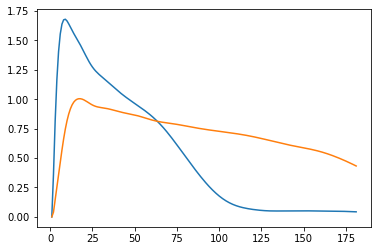

In [73]:
plt.plot(df_res_1.drop(lst_drop, axis= 1).iloc[60, :])
plt.plot(df_res_1.drop(lst_drop, axis= 1).iloc[6, :])

Доверительный интервал для roc-auc на старах данных и на новых
стат достоверность на старах данных и на новых - перестановоычный тест 5000 раз перемешивать
поработать с 76 факторами,а не 77

In [46]:
def clf_gs(model, clf, X, y, params, cv = None, metric = None):
    if (model == "Random Forest") | (model == "XGBClassifier"):
        clf_gs = RandomizedSearchCV(
            clf, params, scoring = metric
        )
    else:
        clf_gs = GridSearchCV(
            clf, params, scoring = metric
        )
    clf_gs.fit(X, y)
    clf_best = clf_gs.best_estimator_
    return clf_best

In [47]:
def list_average(lst):
    lst_res = []
    for x in lst:
        lst_res.append(np.mean(x))
    return lst_res

In [48]:
def bin_classify(model, clf, X, y, cv = None, params = None, metric = None, p = None, scaler = False, gs_subpath = None):

    print(model)
    if scaler == True:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
        
    if cv == None:
        if params == None:
            clf_best = clf
        else:
            clf_best = clf_gs(model, clf, X_scaled, y, params)

        clf_best.fit(X_scaled, y)
        y_pred = clf_best.predict_proba(X_scaled)[:,1]
        return func_rocauc(y, y_pred)
    
    else:
        lst_pred = []
        for i in range(len(y)):
            if i in X.columns:
                name_i = "new_feature_"+str(i)
                try:
                    X_train = X_scaled.drop(i, axis = 0).drop(name_i, axis = 1)
                except:
                    X_train = X_scaled.drop(i, axis = 0).drop(i, axis = 1)
            else:
                X_train = X_scaled.drop(i, axis = 0)
            y_train = y.drop(i)
#             if params == None:
#                 clf_best = clf
#             else:
#                 clf_best = clf_gs(model, clf, X_train, y_train, params)

#             clf_best.fit(X_train, y_train)
# #             Запись обученной модели
            path = "Grid Search//" + model + "//" + gs_subpath
            filename = path+ "//" + str(i)+".sav"
#             Path(path).mkdir(parents=True, exist_ok=True)
#             pickle.dump(clf_best, open(filename, 'wb'))
#             Загрузка обученной модели
            clf_best = pickle.load(open(filename, 'rb'))

            if i in X.columns:
                try:
                    y_pred = clf_best.predict_proba(X_scaled.drop(name_i, axis = 1))[:,1]
                except:
                    y_pred = clf_best.predict_proba(X_scaled.drop(i, axis = 1))[:,1]
            else:
                y_pred = clf_best.predict_proba(X_scaled)[:,1]
            pred_i = y_pred[i]
            lst_pred.append(pred_i)
        print("ODDS RATIO: ", func_odds_ratio(lst_pred, y))
        return func_rocauc(lst_pred, y)

In [49]:
def func_odds_ratio(y_pred, y_label):
    y_od = [int(i > 0.5) for i in y_pred]
    y_od_neg = [1 - i for i in y_od]
    y_label_neg = [1 - i for i in y_label]
    y_label = [int(i) for i in y_label]
    DE = np.sum([a*b for a,b in zip(y_od_neg, y_label_neg)])
    DN = np.sum([a*b for a,b in zip(y_od, y_label_neg)])
    HE = np.sum([a*b for a,b in zip(y_od_neg, y_label)])
    HN = np.sum([a*b for a,b in zip(y_od, y_label)])
    return np.round((DE/DN)/(HE/HN), decimals = 2)

In [50]:
def func_rocauc(y_pred, y_label, alpha = 0.05):
    n = len(y_label)
    boot_n = 1000
    lst_rocauc = []
#     boot_ind = np.random.choice(range(n), (n, 10000), replace=True)
#     boot_pred = y_pred[boot_ind]
#     boot_label = y_label[boot_ind]
#     lst_rocauc = samples_boot.mean(axis=0)
    for i in range(boot_n):
        boot_ind = np.random.randint(n, size = n)
        boot_pred = np.array(y_pred)[boot_ind]
        boot_label = np.array(y_label)[boot_ind]
        if len(np.unique(boot_label)) > 1:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
            lst_rocauc.append(roc_auc_score(boot_label, boot_pred))
        
    # Plot ROC_AUC
    fpr, tpr, threshold = metrics.roc_curve(y_label, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
#     plt.hist(lst_rocauc, bins=50)
#     plt.title('Histogram of the bootstrapped ROC AUC scores')
#     plt.show()
    print("ROC-AUC confidence interval (alpha = ", alpha, ") : ", np.quantile(lst_rocauc, [alpha/2, 1 - (alpha)/2]))
    print("ROC-AUC: ", roc_auc_score(y_label, y_pred))
    return np.quantile(lst_rocauc, [alpha/2, 1 - (alpha)/2]), roc_auc_score(y_label, y_pred)


In [51]:
def SVM_features(X, y, cv = None, params = None, metric = None, scaler = False):
    """
    Get support vectors of dataset
    """
    print("By support vectors")
    if scaler == True:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
    model = "SVM"
    clf = SVC()
#     params = {}
    if params == None:
        clf_best = clf
    else:
        clf_best = clf_gs(model, clf, X, y, params)
    clf_best.fit(X, y)
    clf_best.predict(X)
    return pd.DataFrame(clf_best.support_vectors_, index = clf_best.support_)

In [52]:
def make_new_features(df_orig, df_new, metric_type = None, p = None):
#     df_add = df.drop(drop_feat_list, axis=1)
    if metric_type == None:
        print("original")
        df_result = df_orig
    else:
        df_result = pd.DataFrame()
        if p == None:
            print(metric_type)
            for i in df_new.index.values.tolist():
                new_feature = "new_feature_" + str(i)
                df_result[new_feature] = distance.cdist(
                    df_orig,
                    [df_new.T[i]],
                    metric = metric_type
                ).flatten()
        else:
            print(metric_type, p)
            for i in df_new.index.values.tolist():
                new_feature = "new_feature_" + str(i)

                df_result[new_feature] = distance.cdist(
                    df_orig,
                    [df_new.T[i]],
                    metric = metric_type,
                    p = p
                ).flatten()

    return df_result

In [53]:
class model_class:
   'class of models'
   def __init__(self, model, clf, gs_params):
      self.model = model
      self.clf = clf
      self.gs_params = gs_params

In [54]:
lst_metric_type = ['euclidean', 'minkowski', 'cosine', None]
# lst_p = [1, 2]
lst_p = [1]
lst_SVM_ind = [False]

# Grid Search parametres

In [33]:
gs_params_SVC = {
    'gamma' : [0.001, 0.01, 0.1, 1, 10],
    'kernel' : ['linear', 'rbf', 'sigmoid'],
    'C' : [0.01, 0.1, 1, 10, 100]
}

In [34]:
lst_model_class = []

model = "XGBClassifier"
clf = XGBClassifier(n_estimators=100, random_state=13, n_jobs = -1)
gs_params = {
        'learning_rate' : [0.02, 0.1],
        'min_child_weight': [3, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.8],
        'max_depth' : [5, 7, 9],
        'criterion' : ['gini', 'entropy'],
        'min_samples_leaf' : [3, 5]
        }

lst_model_class.append(model_class(model, clf, gs_params))

model = "Logistic Regression"
clf = LogisticRegression(random_state = 13)
gs_params = {
    'solver' : ['liblinear'],
    'C' : [0.01, 0.1, 1, 10]
}

lst_model_class.append(model_class(model, clf, gs_params))

model = "Random Forest"
clf = RandomForestClassifier(n_estimators=100, random_state=13, n_jobs = -1)
gs_params = {
    'max_depth' : [5, 7, 9],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [3, 5]
}

lst_model_class.append(model_class(model, clf, gs_params))


# Distance based methods

euclidean 1
XGBClassifier
ODDS RATIO:  3.44


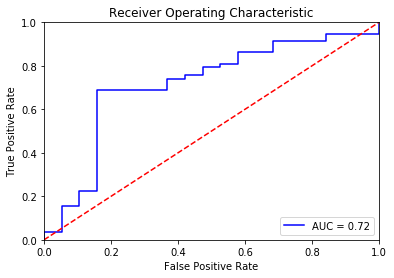

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.56623185 0.84531699]
ROC-AUC:  0.7150635208711433
-------------------------------------------------------------
Logistic Regression
ODDS RATIO:  3.36


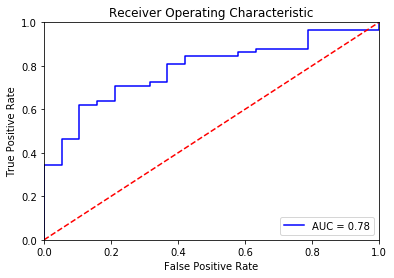

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.67238111 0.87571861]
ROC-AUC:  0.7849364791288567
-------------------------------------------------------------
Random Forest
ODDS RATIO:  2.51


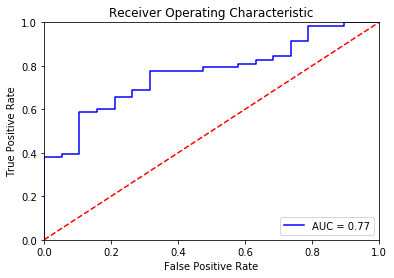

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.65555085 0.86252908]
ROC-AUC:  0.7676950998185118
-------------------------------------------------------------
minkowski 1
XGBClassifier
ODDS RATIO:  2.16


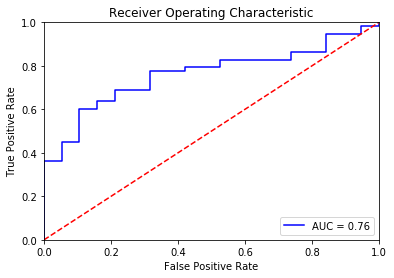

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.65051569 0.86612948]
ROC-AUC:  0.7622504537205081
-------------------------------------------------------------
Logistic Regression
ODDS RATIO:  3.18


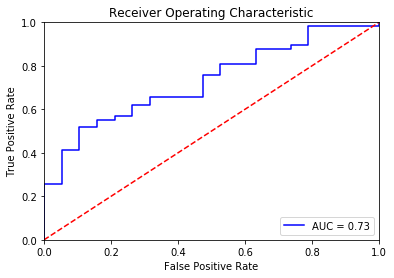

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.5940207  0.84310656]
ROC-AUC:  0.7295825771324864
-------------------------------------------------------------
Random Forest
ODDS RATIO:  4.25


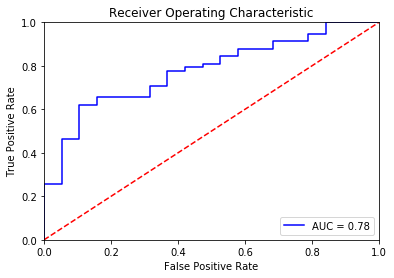

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.66072813 0.87457237]
ROC-AUC:  0.7776769509981852
-------------------------------------------------------------
cosine 1
XGBClassifier
ODDS RATIO:  3.29


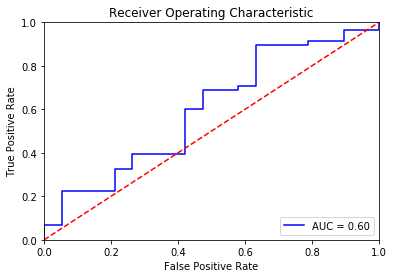

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.43847345 0.76140688]
ROC-AUC:  0.5998185117967332
-------------------------------------------------------------
Logistic Regression


/home/mahir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


ODDS RATIO:  nan


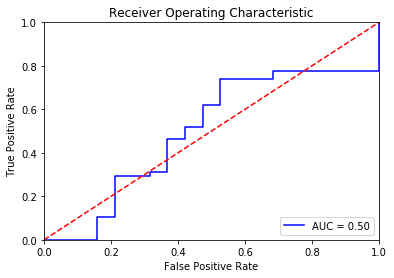

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.34298941 0.67152049]
ROC-AUC:  0.499092558983666
-------------------------------------------------------------
Random Forest
ODDS RATIO:  3.79


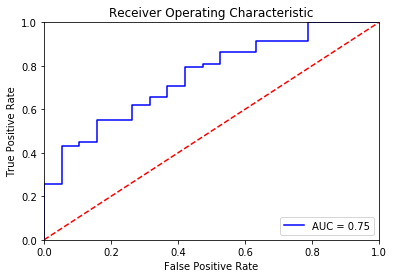

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.63258981 0.86737814]
ROC-AUC:  0.7522686025408348
-------------------------------------------------------------


TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [96]:
for SVM_ind in lst_SVM_ind:
    if SVM_ind == True:
        df_new = SVM_features(
            df_old, label, params = gs_params_SVC
        )
    else:
        df_new = df_old
    for metric_type in lst_metric_type:
        for p in lst_p:
            if (p == 1) | ((p == 2) & (metric_type == 'minkowski')):
                df_new_feat = make_new_features(
                    df_old, df_new, metric_type, p
                )
                for i in range(len(lst_model_class)):
                    bin_classify(
                        lst_model_class[i].model,
                        lst_model_class[i].clf,
                        df_new_feat,
                        label,
                        cv = loocv,
                        params = lst_model_class[i].gs_params,
                        gs_subpath = metric_type + str(p)
                    )
                    #  Надо gs_subpath = str(SVM_ind) + "_" + metric_type + "_" + str(p)
                    print("-------------------------------------------------------------")

# Original

XGBClassifier


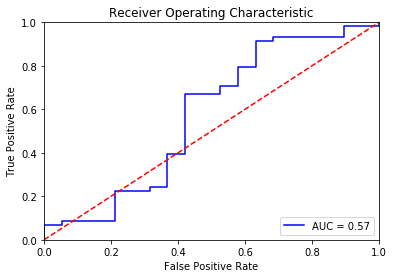

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.40467726 0.73685326]
ROC-AUC:  0.5716878402903811
-------------------------------------------------------------
Logistic Regression


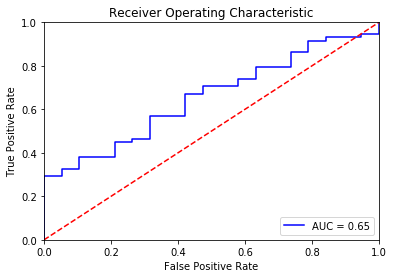

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.52047386 0.77843137]
ROC-AUC:  0.6542649727767695
-------------------------------------------------------------
Random Forest


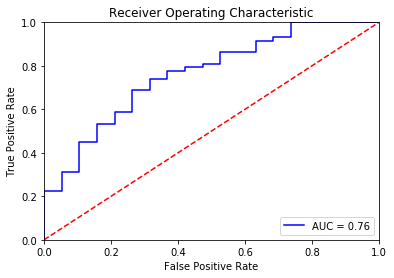

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.62254652 0.87098842]
ROC-AUC:  0.7622504537205081
-------------------------------------------------------------


In [53]:
df_new_feat = df_old
metric_type = None
for i in range(len(lst_model_class)):
    bin_classify(
        lst_model_class[i].model,
        lst_model_class[i].clf,
        df_new_feat,
        label,
        cv = loocv,
        params = lst_model_class[i].gs_params,
        gs_subpath = str(metric_type)
    )
    print("-------------------------------------------------------------")

XGBClassifier
ODDS RATIO:  2.16


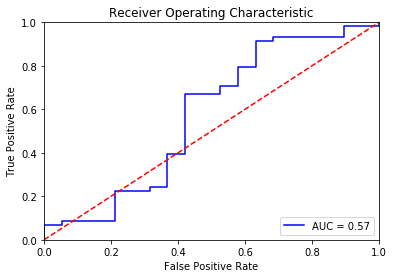

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.38562971 0.73229062]
ROC-AUC:  0.5716878402903811
-------------------------------------------------------------
Logistic Regression
ODDS RATIO:  1.94


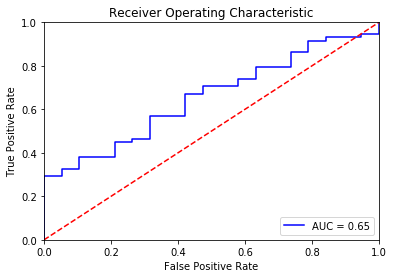

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.52058373 0.78382145]
ROC-AUC:  0.6542649727767695
-------------------------------------------------------------
Random Forest
ODDS RATIO:  4.25


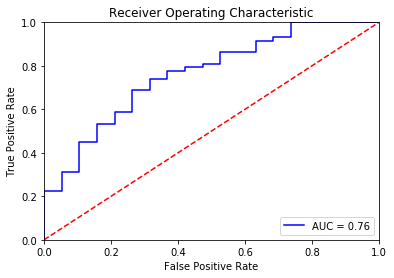

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.63445788 0.88022492]
ROC-AUC:  0.7622504537205081
-------------------------------------------------------------


In [97]:
df_new_feat = df_old
metric_type = None
for i in range(len(lst_model_class)):
    bin_classify(
        lst_model_class[i].model,
        lst_model_class[i].clf,
        df_new_feat,
        label,
        cv = loocv,
        params = lst_model_class[i].gs_params,
        gs_subpath = str(metric_type)
    )
    print("-------------------------------------------------------------")

# Feature Selection

In [25]:
from sklearn.linear_model import Lasso

In [26]:
clf = Lasso()

In [542]:
df = df_old

In [543]:
label_pred = cross_val_predict(clf, df, label, cv = loocv)

In [544]:
clf.fit(df, label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [545]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

def calc_vif(X):

    # Calculating VIF
    df_vif = pd.DataFrame()
    df_vif["variables"] = X.columns
    df_vif["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]

    return(df_vif)

In [546]:
X = df.iloc[:,:-1]
calc_vif(X)

D:\python_anaconda_jupiter\anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,0,inf
1,1,inf
2,2,inf
3,3,inf
4,4,inf
5,5,inf
6,6,inf
7,7,inf
8,8,inf
9,9,inf


In [547]:
df.corr()[0].drop(0)

1      0.908991
2      0.634287
3      0.461481
4      0.378245
5      0.326972
6      0.285820
7      0.249499
8      0.213961
9      0.179444
10     0.146668
11     0.116019
12     0.087674
13     0.061732
14     0.038283
15     0.017417
16    -0.000820
17    -0.016463
18    -0.030248
19    -0.041982
20    -0.052314
21    -0.061735
22    -0.069453
23    -0.075591
24    -0.081875
25    -0.087440
26    -0.092357
27    -0.096624
28    -0.101616
29    -0.106632
30    -0.111318
31    -0.115712
32    -0.119845
33    -0.123744
34    -0.127433
35    -0.130937
36    -0.134282
37    -0.137498
38    -0.140615
39    -0.143663
40    -0.146670
41    -0.149660
42    -0.152650
43    -0.155648
44    -0.158657
45    -0.161668
46    -0.164666
47    -0.167631
48    -0.170536
49    -0.173352
50    -0.176048
51    -0.178591
52    -0.180948
53    -0.183089
54    -0.184988
55    -0.186620
56    -0.187969
57    -0.189028
58    -0.189799
59    -0.190295
60    -0.190540
61    -0.190569
62    -0.190422
63    -0

In [548]:
for i in range(df.shape[1]):
    print(df.corr()[i].drop(i).max())

0.9089910584674218
0.9089910584674218
0.9647080729571205
0.9893326787575372
0.9942627707725514
0.9960270232633093
0.9960270232633093
0.996109998262849
0.9969343143375978
0.9973223640770368
0.9973914639206256
0.9973914639206256
0.9972245748100471
0.9968980440854359
0.9965049813715623
0.9961417060121511
0.9958797999488375
0.9958296099200159
0.9960464502957777
0.9963642909536717
0.9964974694162558
0.9965690874689035
0.9968025415796073
0.9978986154846444
0.9986298903146477
0.9991757084766236
0.9992328218822975
0.9998650445219186
0.999903331492886
0.999903331492886
0.999900100717346
0.9998967266886388
0.9998937387317002
0.9998911972551965
0.9998886868716027
0.9998854632653688
0.9998806760747173
0.9998736456710505
0.9998640471576052
0.9998520263150886
0.9998381312967056
0.9998231472067495
0.999807897343948
0.9997929943491786
0.9997786705522737
0.999764664569063
0.9997502138813417
0.9997341381942475
0.9997149988456736
0.9996912865141856
0.9996616336039214
0.9996249639671897
0.9995807320807004

In [549]:
lst_rc = []
df_rc = pd.DataFrame(range(df.shape[1]), columns= ['cols'])
for i in range(df.shape[1]):
    lst_rc.append(abs(2*roc_auc_score(label, df[i]) - 1))
df_rc['roc_auc'] = lst_rc
df_rc

,cols,roc_auc
0,0,0.063521
1,1,0.194192
2,2,0.306715
3,3,0.379310
4,4,0.424682
5,5,0.462795
6,6,0.480944
7,7,0.491833
8,8,0.491833
9,9,0.497278


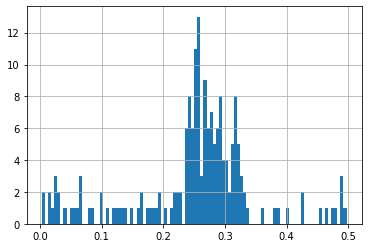

In [550]:
df_rc.sort_values(by= "roc_auc", ascending=False)['roc_auc'].hist(bins = 100)

In [551]:
df_check = df_rc[df_rc.roc_auc>0.3]

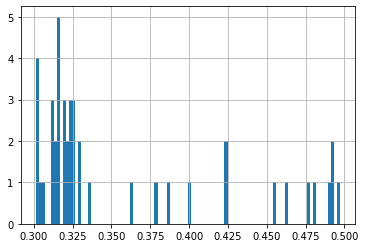

In [552]:
df_check.sort_values(by= "roc_auc", ascending=False)['roc_auc'].hist(bins = 100)

In [553]:
df_check = df_rc[df_rc.roc_auc>0.35].sort_values(by= "roc_auc", ascending=False).reset_index(drop = True)

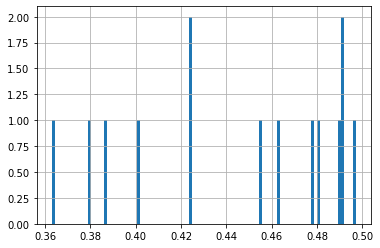

In [554]:
df_check.sort_values(by= "roc_auc", ascending=False)['roc_auc'].hist(bins = 100)

In [555]:
df_check['range_rc'] = [i + 1 for i in df_check.index.tolist()]

In [556]:
df_check.sort_values(by= "roc_auc", ascending=False)

,cols,roc_auc,range_rc
0,9,0.497278,1
1,7,0.491833,2
2,8,0.491833,3
3,10,0.490018,4
4,6,0.480944,5
5,11,0.477314,6
6,5,0.462795,7
7,12,0.455535,8
8,4,0.424682,9
9,13,0.424682,10


In [557]:
df_check

,cols,roc_auc,range_rc
0,9,0.497278,1
1,7,0.491833,2
2,8,0.491833,3
3,10,0.490018,4
4,6,0.480944,5
5,11,0.477314,6
6,5,0.462795,7
7,12,0.455535,8
8,4,0.424682,9
9,13,0.424682,10


In [558]:
df_check1 = df[df_check.cols]

In [559]:
df_check1

,9,7,8,10,6,11,5,12,4,13,14,15,3,16
0,-1.480813,-1.450905,-1.474295,-1.470452,-1.418316,-1.443360,-1.401617,-1.399882,-1.373702,-1.340463,-1.265860,-1.177643,-1.322822,-1.078593
1,-1.498455,-1.463019,-1.488314,-1.494508,-1.427572,-1.476359,-1.403580,-1.443707,-1.360573,-1.396739,-1.336547,-1.265239,-1.283264,-1.185742
2,-1.068984,-1.152152,-1.111905,-1.026781,-1.189044,-0.985070,-1.236247,-0.941717,-1.261019,-0.894467,-0.842225,-0.785497,-1.240706,-0.726058
3,-0.681885,-0.828093,-0.757601,-0.602967,-0.895679,-0.522740,-0.974779,-0.443388,-1.037887,-0.366970,-0.294880,-0.227640,-1.058481,-0.165129
4,-0.520737,-0.620407,-0.565530,-0.484140,-0.687520,-0.451173,-0.776816,-0.416767,-0.862015,-0.376898,-0.329391,-0.274068,-0.918107,-0.212465
5,-1.220559,-1.252103,-1.238226,-1.204948,-1.257000,-1.192257,-1.259320,-1.180604,-1.217696,-1.167069,-1.148820,-1.123768,-1.115598,-1.090907
6,-1.028781,-1.047701,-1.041691,-1.011331,-1.048563,-0.990130,-1.059030,-0.965202,-1.051318,-0.936229,-0.902850,-0.864964,-1.008455,-0.822972
7,-1.452123,-1.448147,-1.455526,-1.439804,-1.432762,-1.417764,-1.428375,-1.384014,-1.401093,-1.336783,-1.275538,-1.201424,-1.329071,-1.117128
8,-1.080366,-1.130642,-1.110239,-1.043350,-1.142152,-0.998837,-1.158240,-0.945606,-1.146988,-0.882985,-0.811574,-0.733318,-1.089798,-0.651066
9,-1.132560,-1.111499,-1.126059,-1.131845,-1.093942,-1.124034,-1.093222,-1.108741,-1.085487,-1.085315,-1.053131,-1.011971,-1.053407,-0.962327


In [560]:
X = df_check1.iloc[:,:]
calc_vif(X)

,variables,VIF
0,9,6.016431e+11
1,7,1.672242e+11
2,8,4.859038e+11
3,10,6.465580e+11
4,6,2.259170e+10
5,11,1.448103e+12
6,5,9.894335e+08
7,12,2.002935e+12
8,4,8.592144e+06
9,13,1.267548e+12


In [561]:
df_check1.corr()

,9,7,8,10,6,11,5,12,4,13,14,15,3,16
9,1.000000,0.986338,0.996934,0.997322,0.967773,0.989572,0.947618,0.976636,0.915596,0.957959,0.932929,0.901246,0.859981,0.863169
7,0.986338,1.000000,0.996110,0.972363,0.995850,0.954666,0.985637,0.933002,0.963731,0.906781,0.875429,0.838715,0.919081,0.796945
8,0.996934,0.996110,1.000000,0.988692,0.984094,0.975897,0.968570,0.958405,0.941111,0.935671,0.907127,0.872529,0.890312,0.832181
10,0.997322,0.972363,0.988692,1.000000,0.948398,0.997391,0.924247,0.989365,0.888497,0.975311,0.954527,0.926607,0.829143,0.891711
6,0.967773,0.995850,0.984094,0.948398,1.000000,0.926267,0.996027,0.901003,0.981055,0.871946,0.838502,0.800431,0.944451,0.758012
11,0.989572,0.954666,0.975897,0.997391,0.926267,1.000000,0.898724,0.997225,0.859984,0.988371,0.972607,0.949366,0.797828,0.918653
5,0.947618,0.985637,0.968570,0.924247,0.996027,0.898724,1.000000,0.870666,0.994263,0.839437,0.804473,0.765554,0.968770,0.722947
12,0.976636,0.933002,0.958405,0.989365,0.901003,0.997225,0.870666,1.000000,0.829637,0.996898,0.986924,0.969308,0.765576,0.943839
4,0.915596,0.963731,0.941111,0.888497,0.981055,0.859984,0.994263,0.829637,1.000000,0.796831,0.761031,0.722027,0.989333,0.680059
13,0.957959,0.906781,0.935671,0.975311,0.871946,0.988371,0.839437,0.996898,0.796831,1.000000,0.996505,0.985404,0.731780,0.966217


# Original

In [564]:
lst_metric_type = [None]
# lst_p = [1, 2]
lst_p = [1]
# lst_SVM_ind = [True, False]
lst_SVM_ind = [False]

In [565]:
lst_model_class = []

# model = "XGBClassifier"
# clf = XGBClassifier(n_estimators=100, random_state=13, n_jobs = -1)
# gs_params = {
#         'learning_rate' : [0.02, 0.1],
#         'min_child_weight': [3, 5],
#         'gamma': [0.5, 1, 1.5],
#         'subsample': [0.8],
#         'max_depth' : [5, 7, 9],
#         'criterion' : ['gini', 'entropy'],
#         'min_samples_leaf' : [3, 5]
#         }

# lst_model_class.append(model_class(model, clf, gs_params))

# model = "Logistic Regression"
# clf = LogisticRegression(random_state = 13)
# gs_params = {
#     'solver' : ['liblinear'],
#     'C' : [0.01, 0.1, 1, 10]
# }

# lst_model_class.append(model_class(model, clf, gs_params))

model = "Random Forest"
clf = RandomForestClassifier(n_estimators=100, random_state=13, n_jobs = -1)
gs_params = {
    'max_depth' : [5, 7, 9],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [3, 5]
}

lst_model_class.append(model_class(model, clf, gs_params))


In [566]:
lst_support = []
lst_ranking = []
n_features = 1
for SVM_ind in lst_SVM_ind:
    if SVM_ind == True:
        df_new = SVM_features(
            df_old, label, params = gs_params_SVC
        )
    else:
        df_new = df_old
    for metric_type in lst_metric_type:
        for p in lst_p:
            if (p == 1) | ((p == 2) & (metric_type == 'minkowski')):
                df_new_feat = make_new_features(
                    df_old, df_new, metric_type, p
                )
                for i in range(len(lst_model_class)):
                    clf_best = clf_gs(
                        lst_model_class[i].model,
                        lst_model_class[i].clf,
                        df_new_feat,
                        label,
                        lst_model_class[i].gs_params
                    )
                    selector = RFE(clf_best, n_features_to_select=n_features, step=1)
                    selector = selector.fit(df_new_feat, label)
                    lst_support.append(selector.support_)

                    lst_ranking.append(selector.ranking_)
#                     bin_classify(
#                         lst_model_class[i].model,
#                         lst_model _class[i].clf,
#                         df_new_feat,
#                         label,
#                         params = lst_model_class[i].gs_params,
#                         gs_subpath = str(SVM_ind) + "_" + metric_type + "_" + str(p)
#                     )
                    print("-------------------------------------------------------------")

-------------------------------------------------------------


In [567]:
clf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [568]:
lst_ranking

[array([ 46, 146, 103,  25,  44,  77,  18,  47,  16,   4,   6,   3,  14,
         33,  22, 138,  37, 112, 108,  70, 142, 148, 161, 163,  74, 143,
         64, 133,  81,  73,  89, 174, 150,  32, 171, 168, 139, 121,  98,
        126, 167, 127,  66,  48, 100,  71, 159, 111, 137, 144, 176, 181,
        149, 155, 153, 170, 136, 154, 115,  90, 106,  69, 179,  60,  87,
        140, 162, 152, 160, 147,  99, 135,  88,  41, 165,  28,  82,  67,
        119,  53,  85,  72,  54,  10, 124,  92,  49,  21,  83,  20, 177,
         27,  15,  24,   7,  40,  39,  80,   9,   1,  35,  34,  19,  43,
          5,  30,   2,  11,  17,  78,  56,  45,  75,  68,  13,  29,  65,
        113,  62, 132,  50,   8,  12,  36,  31,  23,  51,  42,  97, 141,
        145,  63,  38,  96,  52, 107, 118,  86, 157,  93, 130,  79,  91,
        156, 122,  76, 169, 102, 175, 172, 164, 129,  95, 151, 180, 128,
        131, 120, 109, 134, 158, 178,  59,  55, 123, 125, 117, 105, 104,
        114, 173, 116, 166, 101, 110,  94,  84,  57

In [569]:
lst_rc = []
df_rc = pd.DataFrame(range(df.shape[1]), columns= ['cols'])
for i in range(df.shape[1]):
    lst_rc.append(abs(2*roc_auc_score(label, df_new[i]) - 1))
df_rc['roc_auc'] = lst_rc
df_rc['order'] = lst_ranking[0]
df_rc = df_rc.sort_values(by= "roc_auc", ascending=False).reset_index(drop = True)
df_rc['rc_order'] = df_rc.index

In [570]:
pd.set_option('display.max_rows', None)
df_rc.sort_values(by= "order", ascending=True)

,cols,roc_auc,order,rc_order
94,99,0.257713,1,94
45,106,0.297641,2,45
5,11,0.477314,3,5
0,9,0.497278,4,0
53,104,0.292196,5,53
3,10,0.490018,6,3
136,94,0.228675,7,136
15,121,0.330309,8,15
106,98,0.254083,9,106
163,83,0.079855,10,163


In [571]:
df_rc.loc[df_rc['order'] < 10, 'cols']

0        9
3       10
5       11
15     121
45     106
53     104
94      99
106     98
136     94
Name: cols, dtype: int64

In [572]:
lst_cols = df_rc.loc[df_rc['order'] < 10, 'cols'].drop(3)
lst_cols

0        9
5       11
15     121
45     106
53     104
94      99
106     98
136     94
Name: cols, dtype: int64

In [573]:
X = df_new_feat[lst_cols].iloc[:,:]
calc_vif(X)

,variables,VIF
0,9,7.031090e+01
1,11,6.622248e+01
2,121,6.799565e+02
3,106,2.548941e+06
4,104,9.105368e+06
5,99,6.295299e+07
6,98,4.915991e+07
7,94,2.759318e+05


In [574]:
X.corr()

,9,11,121,106,104,99,98,94
9,1.000000,0.989572,-0.777555,-0.775906,-0.770964,-0.748040,-0.740956,-0.701167
11,0.989572,1.000000,-0.749334,-0.744492,-0.738902,-0.713987,-0.706409,-0.664146
121,-0.777555,-0.749334,1.000000,0.969353,0.958091,0.916963,0.905962,0.850136
106,-0.775906,-0.744492,0.969353,1.000000,0.998987,0.984776,0.979284,0.945278
104,-0.770964,-0.738902,0.958091,0.998987,1.000000,0.991530,0.987285,0.958487
99,-0.748040,-0.713987,0.916963,0.984776,0.991530,1.000000,0.999561,0.987095
98,-0.740956,-0.706409,0.905962,0.979284,0.987285,0.999561,1.000000,0.991383
94,-0.701167,-0.664146,0.850136,0.945278,0.958487,0.987095,0.991383,1.000000


In [575]:
df_new_feat.corr()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,1.000000,0.908991,0.634287,0.461481,0.378245,0.326972,0.285820,0.249499,0.213961,0.179444,...,-0.143639,-0.143404,-0.143191,-0.143000,-0.142832,-0.142703,-0.142719,-0.142815,-0.142940,-0.143028
1,0.908991,1.000000,0.883483,0.748761,0.667946,0.611387,0.564063,0.522621,0.482241,0.443282,...,-0.349502,-0.347746,-0.345936,-0.344080,-0.342192,-0.340329,-0.338792,-0.337420,-0.336096,-0.334657
2,0.634287,0.883483,1.000000,0.964708,0.919284,0.878095,0.839563,0.804068,0.767733,0.731613,...,-0.579273,-0.576439,-0.573490,-0.570423,-0.567247,-0.564046,-0.561193,-0.558518,-0.555864,-0.553005
3,0.461481,0.748761,0.964708,1.000000,0.989333,0.968770,0.944451,0.919081,0.890312,0.859981,...,-0.671946,-0.669327,-0.666542,-0.663572,-0.660415,-0.657112,-0.653826,-0.650497,-0.647049,-0.643381
4,0.378245,0.667946,0.919284,0.989333,1.000000,0.994263,0.981055,0.963731,0.941111,0.915596,...,-0.700763,-0.698358,-0.695747,-0.692914,-0.689855,-0.686581,-0.683156,-0.679546,-0.675722,-0.671666
5,0.326972,0.611387,0.878095,0.968770,0.994263,1.000000,0.996027,0.985637,0.968570,0.947618,...,-0.709467,-0.707229,-0.704755,-0.702037,-0.699073,-0.695852,-0.692389,-0.688642,-0.684613,-0.680347
6,0.285820,0.564063,0.839563,0.944451,0.981055,0.996027,1.000000,0.995850,0.984094,0.967773,...,-0.709050,-0.706950,-0.704590,-0.701974,-0.699106,-0.695955,-0.692510,-0.688712,-0.684582,-0.680214
7,0.249499,0.522621,0.804068,0.919081,0.963731,0.985637,0.995850,1.000000,0.996110,0.986338,...,-0.714203,-0.712166,-0.709849,-0.707267,-0.704428,-0.701288,-0.697824,-0.693948,-0.689700,-0.685211
8,0.213961,0.482241,0.767733,0.890312,0.941111,0.968570,0.984094,0.996110,1.000000,0.996934,...,-0.714907,-0.712900,-0.710597,-0.708025,-0.705198,-0.702057,-0.698574,-0.694638,-0.690297,-0.685716
9,0.179444,0.443282,0.731613,0.859981,0.915596,0.947618,0.967773,0.986338,0.996934,1.000000,...,-0.709576,-0.707583,-0.705282,-0.702713,-0.699892,-0.696753,-0.693261,-0.689287,-0.684887,-0.680252


In [576]:
pd.set_option('display.max_rows', None)
df_rc.sort_values(by= "order", ascending=True)

,cols,roc_auc,order,rc_order
94,99,0.257713,1,94
45,106,0.297641,2,45
5,11,0.477314,3,5
0,9,0.497278,4,0
53,104,0.292196,5,53
3,10,0.490018,6,3
136,94,0.228675,7,136
15,121,0.330309,8,15
106,98,0.254083,9,106
163,83,0.079855,10,163


In [577]:
lst_select = df_rc.sort_values(by= "cols", ascending=True)['cols']

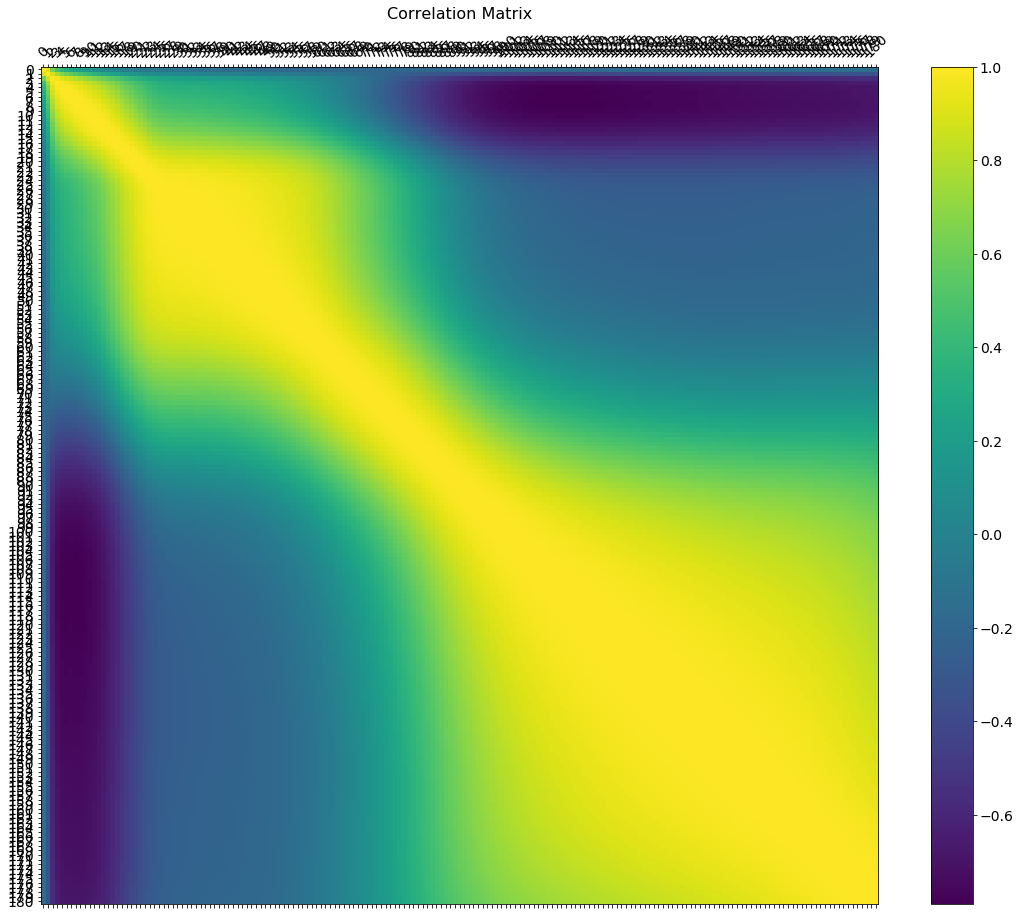

In [578]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_new_feat[lst_select].corr(), fignum=f.number)
plt.xticks(range(df_new_feat[lst_select].shape[1]), df_new_feat[lst_select].columns, fontsize=14, rotation=45)
plt.yticks(range(df_new_feat[lst_select].shape[1]), df_new_feat[lst_select].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [599]:
import pandas as pd
import scipy.cluster.hierarchy as spc


# df = pd.DataFrame(my_data)
corr = df_new_feat.corr().values

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.15 * pdist.max(), 'distance')

In [600]:
idx

array([ 4,  4,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  5,  5,
        1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2, 10, 10, 10, 10, 10, 10,
       10, 10,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8, 11, 11, 11, 11,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14], dtype=int32)

In [601]:
df_rc = df_rc.sort_values(by = 'cols')

In [602]:
df_rc['cluster'] = idx.tolist()

In [626]:
df_check3 = df_rc[df_rc.order.isin(df_rc.groupby('cluster')['order'].min().tolist())]

In [627]:
df_check3

,cols,roc_auc,order,rc_order,cluster
165,0,0.063521,46,165,4
38,2,0.306715,103,38,7
5,11,0.477314,3,5,6
10,14,0.401089,22,10,5
42,19,0.301270,70,42,1
96,33,0.257713,32,96,3
155,61,0.134301,69,155,2
158,63,0.117967,60,158,10
177,73,0.018149,41,177,9
180,75,0.003630,28,180,8


In [628]:
df_check3 = df_check3.drop([139, 158, 180])

In [629]:
lst_cols = df_check3.loc[:,'cols']
lst_cols

165      0
38       2
5       11
10      14
42      19
96      33
155     61
177     73
163     83
94      99
15     121
Name: cols, dtype: int64

In [630]:
X.corr()

,0,2,11,14,19,33,61,63,73,83,99,121
0,1.000000,0.634287,0.116019,0.038283,-0.041982,-0.123744,-0.190569,-0.190146,-0.195359,-0.188571,-0.173316,-0.168302
2,0.634287,1.000000,0.662203,0.560414,0.391182,0.216944,0.007845,-0.018834,-0.201390,-0.423607,-0.639325,-0.662973
11,0.116019,0.662203,1.000000,0.972607,0.797891,0.531350,0.219219,0.170446,-0.116602,-0.426866,-0.713987,-0.749334
14,0.038283,0.560414,0.972607,1.000000,0.905697,0.657443,0.366860,0.317969,0.025754,-0.300086,-0.616023,-0.666849
19,-0.041982,0.391182,0.797891,0.905697,1.000000,0.875598,0.635765,0.588661,0.308041,-0.016772,-0.369259,-0.455069
33,-0.123744,0.216944,0.531350,0.657443,0.875598,1.000000,0.815261,0.769819,0.511246,0.218613,-0.124077,-0.230346
61,-0.190569,0.007845,0.219219,0.366860,0.635765,0.815261,1.000000,0.995981,0.875967,0.616101,0.193986,-0.000654
63,-0.190146,-0.018834,0.170446,0.317969,0.588661,0.769819,0.995981,1.000000,0.912509,0.669092,0.243951,0.038555
73,-0.195359,-0.201390,-0.116602,0.025754,0.308041,0.511246,0.875967,0.912509,1.000000,0.898126,0.523904,0.276379
83,-0.188571,-0.423607,-0.426866,-0.300086,-0.016772,0.218613,0.616101,0.669092,0.898126,1.000000,0.819019,0.582798


In [631]:
X = df_new_feat[lst_cols].iloc[:,:]
calc_vif(X)

,variables,VIF
0,0,2.668544
1,2,6.892528
2,11,185.280440
3,14,343.888036
4,19,89.081470
5,33,21.407423
6,61,66.287611
7,73,229.751419
8,83,233.335702
9,99,111.057472


In [632]:
X.to_csv("..//Results//Feature_selection//" + "original" + ".csv")

# Euclidean

In [318]:
lst_metric_type = ['euclidean']
# lst_p = [1, 2]
lst_p = [1]
# lst_SVM_ind = [True, False]
lst_SVM_ind = [False]

In [319]:
lst_model_class = []

# model = "XGBClassifier"
# clf = XGBClassifier(n_estimators=100, random_state=13, n_jobs = -1)
# gs_params = {
#         'learning_rate' : [0.02, 0.1],
#         'min_child_weight': [3, 5],
#         'gamma': [0.5, 1, 1.5],
#         'subsample': [0.8],
#         'max_depth' : [5, 7, 9],
#         'criterion' : ['gini', 'entropy'],
#         'min_samples_leaf' : [3, 5]
#         }

# lst_model_class.append(model_class(model, clf, gs_params))

# model = "Logistic Regression"
# clf = LogisticRegression(random_state = 13)
# gs_params = {
#     'solver' : ['liblinear'],
#     'C' : [0.01, 0.1, 1, 10]
# }

# lst_model_class.append(model_class(model, clf, gs_params))

model = "Random Forest"
clf = RandomForestClassifier(n_estimators=100, random_state=13, n_jobs = -1)
gs_params = {
    'max_depth' : [5, 7, 9],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [3, 5]
}

lst_model_class.append(model_class(model, clf, gs_params))


In [320]:
lst_support = []
lst_ranking = []
n_features = 1
for SVM_ind in lst_SVM_ind:
    if SVM_ind == True:
        df_new = SVM_features(
            df_old, label, params = gs_params_SVC
        )
    else:
        df_new = df_old
    for metric_type in lst_metric_type:
        for p in lst_p:
            if (p == 1) | ((p == 2) & (metric_type == 'minkowski')):
                df_new_feat = make_new_features(
                    df_old, df_new, metric_type, p
                )
                for i in range(len(lst_model_class)):
                    clf_best = clf_gs(
                        lst_model_class[i].model,
                        lst_model_class[i].clf,
                        df_new_feat,
                        label,
                        lst_model_class[i].gs_params
                    )
                    selector = RFE(clf_best, n_features_to_select=n_features, step=1)
                    selector = selector.fit(df_new_feat, label)
                    lst_support.append(selector.support_)

                    lst_ranking.append(selector.ranking_)
#                     bin_classify(
#                         lst_model_class[i].model,
#                         lst_model _class[i].clf,
#                         df_new_feat,
#                         label,
#                         params = lst_model_class[i].gs_params,
#                         gs_subpath = str(SVM_ind) + "_" + metric_type + "_" + str(p)
#                     )
                    print("-------------------------------------------------------------")

euclidean 1
-------------------------------------------------------------


In [321]:
clf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [322]:
metric_type

'euclidean'

In [330]:
lst_ranking

[array([36,  7, 10, 13, 41, 12, 54, 57, 19, 29, 51, 40, 44,  9, 65, 45, 63,
        47, 37, 72, 48, 35, 49, 77, 33, 52, 23, 31, 46, 71, 62, 30, 15, 69,
         6, 14, 76, 28, 60, 21, 50, 67, 34, 42, 61, 24, 58, 55, 64, 75, 56,
        59, 16, 74, 70, 26, 68, 53, 25,  3, 11, 27, 39, 20,  1,  5,  2, 18,
         4, 17, 38, 43, 66, 73, 22,  8, 32])]

In [340]:
for i in df_new_feat.columns:
    print(i, df_new_feat[i])

new_feature_0 0      0.000000
1      6.343117
2      5.042102
3      6.180289
4     30.761529
5      8.696015
6      3.919685
7      5.473391
8     18.436137
9      8.905964
10     2.807274
11     3.342058
12     3.225101
13    11.912162
14    23.908297
15    29.648119
16    25.619451
17    26.476516
18    30.896135
19    26.288645
20    28.027925
21    33.858238
22    33.239187
23    28.139046
24    33.291748
25    34.244954
26    21.840445
27    21.749112
28    25.142574
29    31.124419
30    27.960020
31    27.223509
32    33.240652
33    27.017718
34    21.443292
35    32.778824
36    18.244820
37    33.859063
38    28.766086
39    22.706671
40    26.991292
41    25.687855
42    23.233469
43    25.589094
44    26.446386
45    33.398479
46    28.966896
47    28.058826
48    24.980941
49    27.339996
50    29.770533
51    25.442857
52    33.170474
53    25.503789
54    25.976600
55    10.802612
56    26.486773
57    30.633169
58    23.014731
59    10.757891
60    25.116457
61    25.8

In [344]:
len(lst_rc)

77

In [373]:
lst_rc = []
df_rc = pd.DataFrame(df_new_feat.columns, columns= ['cols_name'])
for i in df_new_feat.columns:
    lst_rc.append(abs(2*roc_auc_score(label, df_new_feat[i]) - 1))
df_rc['roc_auc'] = lst_rc
df_rc['order'] = lst_ranking[0].tolist()
df_rc['cols'] = df_new_feat.index.tolist() 
df_rc = df_rc.sort_values(by= "roc_auc", ascending=False).reset_index(drop = True)
df_rc['rc_order'] = df_rc.index

In [374]:
pd.set_option('display.max_rows', None)
df_rc.sort_values(by= "order", ascending=True)

,cols_name,roc_auc,order,cols,rc_order
2,new_feature_64,0.602541,1,64,2
0,new_feature_66,0.607985,2,66,0
3,new_feature_59,0.598911,3,59,3
6,new_feature_68,0.542650,4,68,6
4,new_feature_65,0.580762,5,65,4
22,new_feature_34,0.332123,6,34,22
8,new_feature_1,0.520871,7,1,8
1,new_feature_75,0.602541,8,75,1
10,new_feature_13,0.475499,9,13,10
13,new_feature_2,0.468240,10,2,13


In [363]:
# df_rc.loc[df_rc['order'] < 10, 'cols']

In [375]:
# lst_cols = df_rc.loc[df_rc['order'] < 10, 'cols'].drop(3)
# lst_cols

In [376]:
# X = df_new_feat[lst_cols].iloc[:,:]
# calc_vif(X)

In [377]:
# X.corr()

In [378]:
df_new_feat.corr()

,new_feature_0,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,new_feature_8,new_feature_9,...,new_feature_67,new_feature_68,new_feature_69,new_feature_70,new_feature_71,new_feature_72,new_feature_73,new_feature_74,new_feature_75,new_feature_76
new_feature_0,1.000000,0.973663,0.983028,0.967214,-0.805248,0.931496,0.993686,0.989360,0.430178,0.921420,...,0.870786,0.962665,0.982858,-0.575706,-0.337410,-0.296763,-0.653592,-0.253943,0.592575,-0.249520
new_feature_1,0.973663,1.000000,0.975376,0.911100,-0.734178,0.956334,0.983702,0.978060,0.351048,0.917050,...,0.905238,0.997911,0.975583,-0.586844,-0.378405,-0.338429,-0.629242,-0.290441,0.614231,-0.252197
new_feature_2,0.983028,0.975376,1.000000,0.961331,-0.733167,0.971875,0.973554,0.961802,0.472288,0.966306,...,0.933416,0.972806,0.999998,-0.517237,-0.275358,-0.246098,-0.579111,-0.181057,0.691706,-0.156431
new_feature_3,0.967214,0.911100,0.961331,1.000000,-0.780030,0.893422,0.945821,0.936669,0.600907,0.928306,...,0.852263,0.898779,0.960913,-0.419978,-0.146936,-0.107310,-0.537137,-0.065659,0.655213,-0.091063
new_feature_4,-0.805248,-0.734178,-0.733167,-0.780030,1.000000,-0.635886,-0.801189,-0.813365,-0.319830,-0.632924,...,-0.527656,-0.707711,-0.732634,0.664004,0.400556,0.376017,0.834510,0.363950,-0.222460,0.462462
new_feature_5,0.931496,0.956334,0.971875,0.893422,-0.635886,1.000000,0.923042,0.908561,0.429078,0.978611,...,0.983768,0.964532,0.972235,-0.520705,-0.289570,-0.289589,-0.535507,-0.180100,0.768320,-0.111956
new_feature_6,0.993686,0.983702,0.973554,0.945821,-0.801189,0.923042,1.000000,0.997348,0.381239,0.899582,...,0.857990,0.973087,0.973463,-0.591528,-0.370057,-0.321987,-0.663920,-0.290006,0.560269,-0.281760
new_feature_7,0.989360,0.978060,0.961802,0.936669,-0.813365,0.908561,0.997348,1.000000,0.361803,0.881826,...,0.838521,0.965710,0.961705,-0.605609,-0.388885,-0.336269,-0.679826,-0.312608,0.530923,-0.307254
new_feature_8,0.430178,0.351048,0.472288,0.600907,-0.319830,0.429078,0.381239,0.361803,1.000000,0.578779,...,0.492848,0.347397,0.471899,0.279749,0.620529,0.549720,0.120166,0.682005,0.720698,0.619220
new_feature_9,0.921420,0.917050,0.966306,0.928306,-0.632924,0.978611,0.899582,0.881826,0.578779,1.000000,...,0.977606,0.922338,0.966461,-0.413156,-0.141840,-0.153290,-0.458556,-0.030223,0.833245,0.016054


In [379]:
pd.set_option('display.max_rows', None)
df_rc.sort_values(by= "order", ascending=True)

,cols_name,roc_auc,order,cols,rc_order
2,new_feature_64,0.602541,1,64,2
0,new_feature_66,0.607985,2,66,0
3,new_feature_59,0.598911,3,59,3
6,new_feature_68,0.542650,4,68,6
4,new_feature_65,0.580762,5,65,4
22,new_feature_34,0.332123,6,34,22
8,new_feature_1,0.520871,7,1,8
1,new_feature_75,0.602541,8,75,1
10,new_feature_13,0.475499,9,13,10
13,new_feature_2,0.468240,10,2,13


In [380]:
df_rc

,cols_name,roc_auc,order,cols,rc_order
0,new_feature_66,0.607985,2,66,0
1,new_feature_75,0.602541,8,75,1
2,new_feature_64,0.602541,1,64,2
3,new_feature_59,0.598911,3,59,3
4,new_feature_65,0.580762,5,65,4
5,new_feature_67,0.577132,18,67,5
6,new_feature_68,0.542650,4,68,6
7,new_feature_5,0.542650,12,5,7
8,new_feature_1,0.520871,7,1,8
9,new_feature_9,0.500907,29,9,9


In [392]:
lst_select = df_rc.sort_values(by= "cols", ascending=True)['cols']

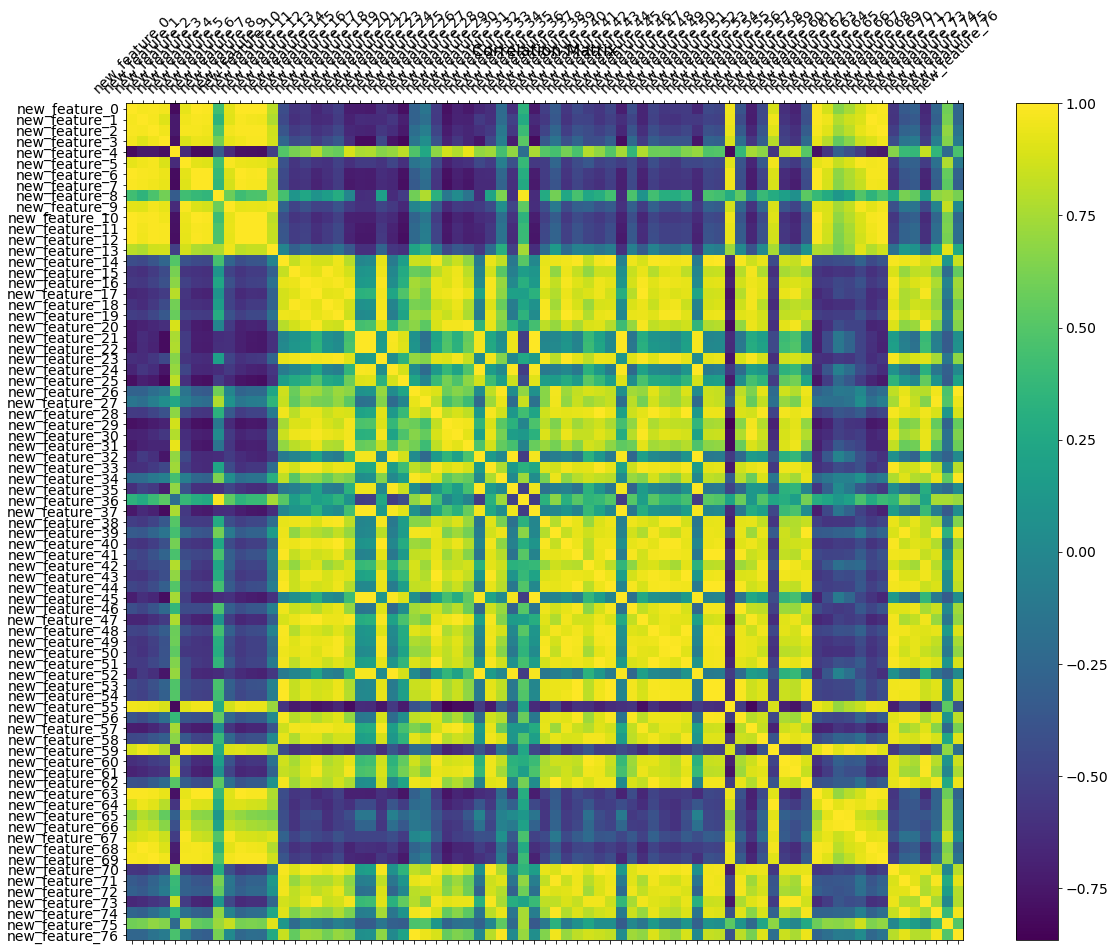

In [391]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_new_feat.loc[lst_select,:].corr(), fignum=f.number)
plt.xticks(range(df_new_feat.loc[lst_select,:].shape[1]), df_new_feat.loc[lst_select,:].columns, fontsize=14, rotation=45)
plt.yticks(range(df_new_feat.loc[lst_select,:].shape[1]), df_new_feat.loc[lst_select,:].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [448]:
import pandas as pd
import scipy.cluster.hierarchy as spc


# df = pd.DataFrame(my_data)
corr = df_new_feat.corr().values

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.15 * pdist.max(), 'distance')

In [449]:
idx

array([10, 10, 10,  9,  7, 10, 10, 10, 11,  9, 10, 10, 10, 12,  4,  5,  5,
        5,  5,  5,  6,  1,  1,  5,  1,  2,  3,  3,  5,  6,  5,  6,  1,  5,
        3,  1, 11,  1,  5,  4,  5,  4,  5,  5,  4,  1,  4,  5,  5,  5,  5,
        5,  1,  4,  4, 10,  4,  5,  5, 10,  5,  5,  4, 10, 10,  8,  8,  9,
       10, 10,  5,  4,  4,  5,  3, 12,  3], dtype=int32)

In [450]:
df_rc = df_rc.sort_values(by = 'cols')

In [451]:
df_rc['cluster'] = idx.tolist()

In [452]:
df_check3 = df_rc[df_rc.order.isin(df_rc.groupby('cluster')['order'].min().tolist())]

In [453]:
df_check3

,cols_name,roc_auc,order,cols,rc_order,cluster
21,new_feature_3,0.375681,13,3,21,9
56,new_feature_4,0.063521,41,4,56,7
26,new_feature_8,0.261343,19,8,26,11
54,new_feature_25,0.074410,52,25,54,2
62,new_feature_31,0.045372,30,31,62,6
22,new_feature_34,0.332123,6,34,22,3
34,new_feature_35,0.179673,14,35,34,1
29,new_feature_39,0.203267,21,39,29,4
46,new_feature_60,0.117967,11,60,46,5
2,new_feature_64,0.602541,1,64,2,10


In [454]:
# df_check3 = df_check3.drop([155, 163, 177])

In [455]:
lst_cols = df_check3.loc[:,'cols_name']
lst_cols

21     new_feature_3
56     new_feature_4
26     new_feature_8
54    new_feature_25
62    new_feature_31
22    new_feature_34
34    new_feature_35
29    new_feature_39
46    new_feature_60
2     new_feature_64
0     new_feature_66
1     new_feature_75
Name: cols_name, dtype: object

In [456]:
X = df_new_feat.loc[:,df_new_feat.columns.isin(lst_cols)].iloc[:,:]
calc_vif(X)

,variables,VIF
0,new_feature_3,98.361930
1,new_feature_4,307.631372
2,new_feature_8,112.291197
3,new_feature_25,89.798755
4,new_feature_31,268.159339
5,new_feature_34,322.643018
6,new_feature_35,116.223064
7,new_feature_39,203.408211
8,new_feature_60,201.388316
9,new_feature_64,698.770885


In [457]:
X.corr()

,new_feature_3,new_feature_4,new_feature_8,new_feature_25,new_feature_31,new_feature_34,new_feature_35,new_feature_39,new_feature_60,new_feature_64,new_feature_66,new_feature_75
new_feature_3,1.000000,-0.780030,0.600907,-0.828520,-0.664621,-0.057427,-0.712389,-0.151256,-0.496458,0.797368,0.666967,0.655213
new_feature_4,-0.780030,1.000000,-0.319830,0.817757,0.939911,0.439008,0.686964,0.451474,0.811777,-0.575294,-0.408377,-0.222460
new_feature_8,0.600907,-0.319830,1.000000,-0.533446,-0.145986,0.632819,-0.601117,0.599782,0.186427,0.279123,0.216047,0.720698
new_feature_25,-0.828520,0.817757,-0.533446,1.000000,0.685541,0.177075,0.852068,0.162402,0.551037,-0.528844,-0.353894,-0.319226
new_feature_31,-0.664621,0.939911,-0.145986,0.685541,1.000000,0.554234,0.453269,0.611616,0.899932,-0.568558,-0.436627,-0.157193
new_feature_34,-0.057427,0.439008,0.632819,0.177075,0.554234,1.000000,0.022836,0.947205,0.827566,-0.133454,-0.048216,0.534529
new_feature_35,-0.712389,0.686964,-0.601117,0.852068,0.453269,0.022836,1.000000,-0.077738,0.323789,-0.297302,-0.104753,-0.223550
new_feature_39,-0.151256,0.451474,0.599782,0.162402,0.611616,0.947205,-0.077738,1.000000,0.858196,-0.325758,-0.273268,0.332976
new_feature_60,-0.496458,0.811777,0.186427,0.551037,0.899932,0.827566,0.323789,0.858196,1.000000,-0.479533,-0.355069,0.103148
new_feature_64,0.797368,-0.575294,0.279123,-0.528844,-0.568558,-0.133454,-0.297302,-0.325758,-0.479533,1.000000,0.969124,0.682025


In [460]:
X.to_csv("..//Results//Feature_selection//" + metric_type + ".csv")

# Minkowski

In [461]:
lst_metric_type = ['minkowski']
# lst_p = [1, 2]
lst_p = [1]
# lst_SVM_ind = [True, False]
lst_SVM_ind = [False]

In [462]:
lst_model_class = []

# model = "XGBClassifier"
# clf = XGBClassifier(n_estimators=100, random_state=13, n_jobs = -1)
# gs_params = {
#         'learning_rate' : [0.02, 0.1],
#         'min_child_weight': [3, 5],
#         'gamma': [0.5, 1, 1.5],
#         'subsample': [0.8],
#         'max_depth' : [5, 7, 9],
#         'criterion' : ['gini', 'entropy'],
#         'min_samples_leaf' : [3, 5]
#         }

# lst_model_class.append(model_class(model, clf, gs_params))

# model = "Logistic Regression"
# clf = LogisticRegression(random_state = 13)
# gs_params = {
#     'solver' : ['liblinear'],
#     'C' : [0.01, 0.1, 1, 10]
# }

# lst_model_class.append(model_class(model, clf, gs_params))

model = "Random Forest"
clf = RandomForestClassifier(n_estimators=100, random_state=13, n_jobs = -1)
gs_params = {
    'max_depth' : [5, 7, 9],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [3, 5]
}

lst_model_class.append(model_class(model, clf, gs_params))


In [463]:
lst_support = []
lst_ranking = []
n_features = 1
for SVM_ind in lst_SVM_ind:
    if SVM_ind == True:
        df_new = SVM_features(
            df_old, label, params = gs_params_SVC
        )
    else:
        df_new = df_old
    for metric_type in lst_metric_type:
        for p in lst_p:
            if (p == 1) | ((p == 2) & (metric_type == 'minkowski')):
                df_new_feat = make_new_features(
                    df_old, df_new, metric_type, p
                )
                for i in range(len(lst_model_class)):
                    clf_best = clf_gs(
                        lst_model_class[i].model,
                        lst_model_class[i].clf,
                        df_new_feat,
                        label,
                        lst_model_class[i].gs_params
                    )
                    selector = RFE(clf_best, n_features_to_select=n_features, step=1)
                    selector = selector.fit(df_new_feat, label)
                    lst_support.append(selector.support_)

                    lst_ranking.append(selector.ranking_)
#                     bin_classify(
#                         lst_model_class[i].model,
#                         lst_model _class[i].clf,
#                         df_new_feat,
#                         label,
#                         params = lst_model_class[i].gs_params,
#                         gs_subpath = str(SVM_ind) + "_" + metric_type + "_" + str(p)
#                     )
                    print("-------------------------------------------------------------")

minkowski 1
-------------------------------------------------------------


In [464]:
clf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [465]:
metric_type

'minkowski'

In [466]:
lst_ranking

[array([26, 11, 28, 10, 65, 19, 17, 13, 22, 30,  4, 64, 16,  1, 56, 48, 69,
        38, 60, 72, 73, 37, 20, 68, 46, 33, 29, 51, 43, 42, 45, 76, 55, 74,
        21, 15, 34, 27, 67, 49, 58, 59,  7, 39, 62, 41, 57, 63, 71, 44, 77,
        35, 54, 40, 66, 61, 75, 70, 50,  9, 31, 47, 14, 25,  6,  2,  3, 18,
         5, 12, 52, 24, 53, 36, 23,  8, 32])]

In [467]:
for i in df_new_feat.columns:
    print(i, df_new_feat[i])

new_feature_0 0       0.000000
1      75.491085
2      61.515092
3      70.183201
4     364.740216
5     109.568719
6      41.084180
7      40.837616
8     207.358907
9      96.649971
10     32.156763
11     34.675294
12     31.708772
13    114.413495
14    293.938106
15    380.751824
16    326.403998
17    323.001992
18    400.017152
19    337.646019
20    348.205597
21    440.188237
22    431.547384
23    355.763663
24    433.180576
25    417.000200
26    229.271273
27    240.251980
28    290.195708
29    393.744897
30    343.016960
31    334.772192
32    432.505317
33    326.956455
34    229.254949
35    421.870840
36    197.019641
37    442.411859
38    370.524387
39    257.524119
40    339.645208
41    318.851939
42    256.607445
43    302.322697
44    324.868624
45    434.726933
46    371.097799
47    349.266539
48    293.510280
49    341.258475
50    377.747610
51    296.756718
52    430.911449
53    311.133675
54    319.509378
55    121.177907
56    333.533295
57    385.959233


In [468]:
len(lst_rc)

77

In [469]:
lst_rc = []
df_rc = pd.DataFrame(df_new_feat.columns, columns= ['cols_name'])
for i in df_new_feat.columns:
    lst_rc.append(abs(2*roc_auc_score(label, df_new_feat[i]) - 1))
df_rc['roc_auc'] = lst_rc
df_rc['order'] = lst_ranking[0].tolist()
df_rc['cols'] = df_new_feat.index.tolist() 
df_rc = df_rc.sort_values(by= "roc_auc", ascending=False).reset_index(drop = True)
df_rc['rc_order'] = df_rc.index

In [470]:
pd.set_option('display.max_rows', None)
df_rc.sort_values(by= "order", ascending=True)

,cols_name,roc_auc,order,cols,rc_order
13,new_feature_13,0.464610,1,13,13
5,new_feature_65,0.578947,2,65,5
1,new_feature_66,0.607985,3,66,1
14,new_feature_10,0.448276,4,10,14
7,new_feature_68,0.546279,5,68,7
2,new_feature_64,0.604356,6,64,2
50,new_feature_42,0.145191,7,42,50
0,new_feature_75,0.622505,8,75,0
3,new_feature_59,0.602541,9,59,3
21,new_feature_3,0.370236,10,3,21


In [471]:
# df_rc.loc[df_rc['order'] < 10, 'cols']

In [472]:
# lst_cols = df_rc.loc[df_rc['order'] < 10, 'cols'].drop(3)
# lst_cols

In [473]:
# X = df_new_feat[lst_cols].iloc[:,:]
# calc_vif(X)

In [474]:
# X.corr()

In [475]:
df_new_feat.corr()

,new_feature_0,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,new_feature_8,new_feature_9,...,new_feature_67,new_feature_68,new_feature_69,new_feature_70,new_feature_71,new_feature_72,new_feature_73,new_feature_74,new_feature_75,new_feature_76
new_feature_0,1.000000,0.971474,0.985254,0.955130,-0.847922,0.937430,0.996766,0.997098,0.461476,0.955139,...,0.897963,0.958620,0.985056,-0.628867,-0.398788,-0.381791,-0.667077,-0.244957,0.754370,-0.143419
new_feature_1,0.971474,1.000000,0.984665,0.888708,-0.798797,0.984057,0.980299,0.974581,0.369099,0.968056,...,0.955571,0.997953,0.984944,-0.663091,-0.466165,-0.436579,-0.673285,-0.311328,0.795536,-0.177504
new_feature_2,0.985254,0.984665,1.000000,0.941317,-0.793291,0.972050,0.988036,0.980982,0.478989,0.986871,...,0.947975,0.978578,0.999997,-0.594750,-0.369682,-0.351393,-0.618746,-0.208602,0.825549,-0.085704
new_feature_3,0.955130,0.888708,0.941317,1.000000,-0.786550,0.858408,0.940405,0.940513,0.665970,0.922281,...,0.837919,0.871651,0.940740,-0.417029,-0.149089,-0.138224,-0.490043,0.002631,0.775617,0.064441
new_feature_4,-0.847922,-0.798797,-0.793291,-0.786550,1.000000,-0.732905,-0.841983,-0.853953,-0.277220,-0.729795,...,-0.652209,-0.777411,-0.793092,0.722949,0.541397,0.434115,0.839863,0.459590,-0.427234,0.447522
new_feature_5,0.937430,0.984057,0.972050,0.858408,-0.732905,1.000000,0.946147,0.935700,0.384105,0.978525,...,0.987637,0.990108,0.972509,-0.632886,-0.437336,-0.416909,-0.626195,-0.276027,0.851133,-0.125232
new_feature_6,0.996766,0.980299,0.988036,0.940405,-0.841983,0.946147,1.000000,0.998108,0.432400,0.958621,...,0.906631,0.968799,0.987909,-0.645146,-0.422998,-0.405364,-0.677296,-0.269173,0.756950,-0.160630
new_feature_7,0.997098,0.974581,0.980982,0.940513,-0.853953,0.935700,0.998108,1.000000,0.428539,0.948226,...,0.893167,0.961296,0.980830,-0.648619,-0.426483,-0.406783,-0.684732,-0.275021,0.739131,-0.171423
new_feature_8,0.461476,0.369099,0.478989,0.665970,-0.277220,0.384105,0.432400,0.428539,1.000000,0.534948,...,0.449637,0.357601,0.478161,0.268646,0.551467,0.524944,0.162375,0.653226,0.685657,0.661496
new_feature_9,0.955139,0.968056,0.986871,0.922281,-0.729795,0.978525,0.958621,0.948226,0.534948,1.000000,...,0.974976,0.967346,0.987001,-0.532934,-0.299241,-0.291872,-0.547788,-0.130643,0.895009,0.006687


In [476]:
pd.set_option('display.max_rows', None)
df_rc.sort_values(by= "order", ascending=True)

,cols_name,roc_auc,order,cols,rc_order
13,new_feature_13,0.464610,1,13,13
5,new_feature_65,0.578947,2,65,5
1,new_feature_66,0.607985,3,66,1
14,new_feature_10,0.448276,4,10,14
7,new_feature_68,0.546279,5,68,7
2,new_feature_64,0.604356,6,64,2
50,new_feature_42,0.145191,7,42,50
0,new_feature_75,0.622505,8,75,0
3,new_feature_59,0.602541,9,59,3
21,new_feature_3,0.370236,10,3,21


In [477]:
df_rc

,cols_name,roc_auc,order,cols,rc_order
0,new_feature_75,0.622505,8,75,0
1,new_feature_66,0.607985,3,66,1
2,new_feature_64,0.604356,6,64,2
3,new_feature_59,0.602541,9,59,3
4,new_feature_67,0.586207,18,67,4
5,new_feature_65,0.578947,2,65,5
6,new_feature_5,0.548094,19,5,6
7,new_feature_68,0.546279,5,68,7
8,new_feature_1,0.526316,11,1,8
9,new_feature_9,0.500907,30,9,9


In [478]:
lst_select = df_rc.sort_values(by= "cols", ascending=True)['cols']

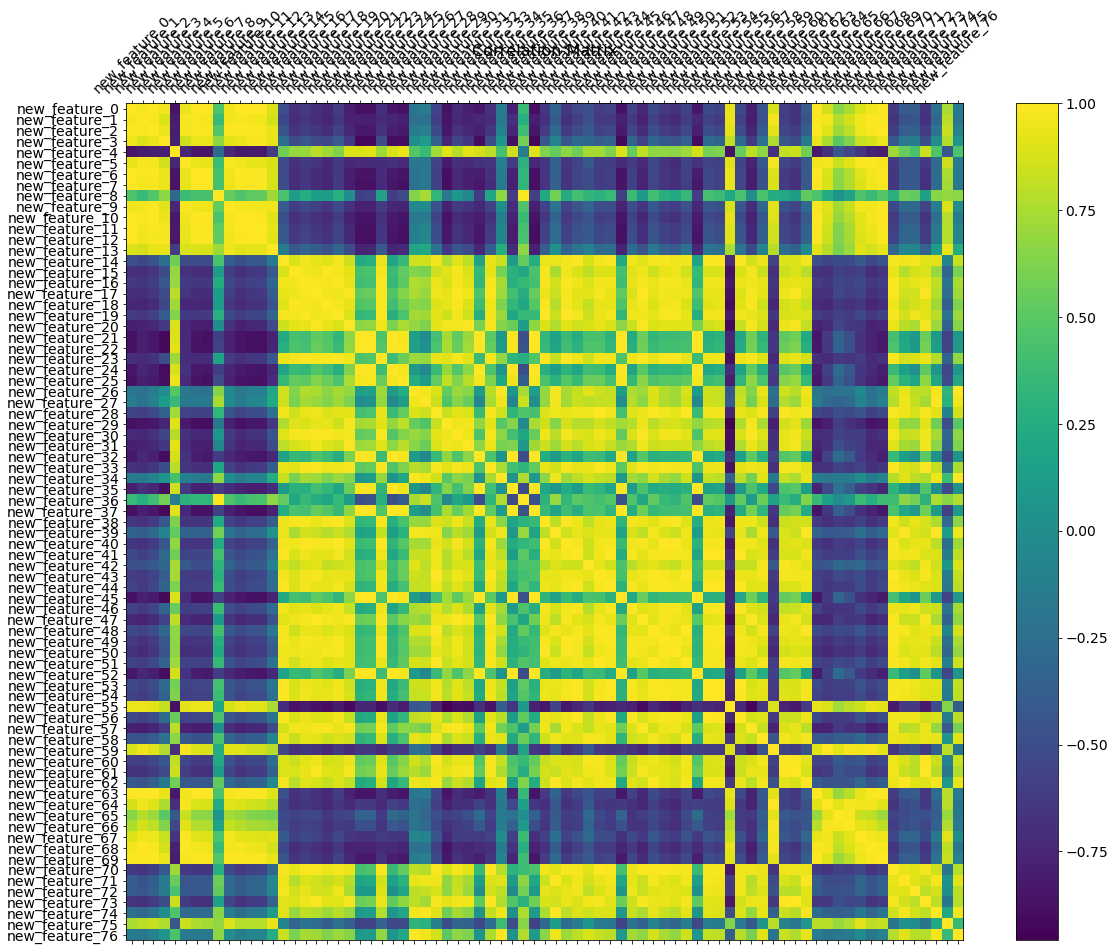

In [479]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_new_feat.loc[lst_select,:].corr(), fignum=f.number)
plt.xticks(range(df_new_feat.loc[lst_select,:].shape[1]), df_new_feat.loc[lst_select,:].columns, fontsize=14, rotation=45)
plt.yticks(range(df_new_feat.loc[lst_select,:].shape[1]), df_new_feat.loc[lst_select,:].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [480]:
import pandas as pd
import scipy.cluster.hierarchy as spc


# df = pd.DataFrame(my_data)
corr = df_new_feat.corr().values

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.15 * pdist.max(), 'distance')

In [481]:
idx

array([ 3,  3,  3,  1, 10,  3,  3,  3,  5,  3,  3,  3,  3,  1,  8,  7,  7,
        7,  7,  7, 10,  9,  9,  7,  9,  9,  6,  6,  8, 10,  7, 10,  9,  7,
        6,  9,  5,  9,  7,  8,  7,  8,  8,  8,  8,  9,  8,  7,  8,  7,  7,
        8,  9,  8,  8,  4,  8,  7,  8,  3,  7,  7,  8,  3,  3,  2,  2,  3,
        3,  3,  7,  8,  8,  7,  6,  1,  6], dtype=int32)

In [482]:
df_rc = df_rc.sort_values(by = 'cols')

In [483]:
df_rc['cluster'] = idx.tolist()

In [484]:
df_check3 = df_rc[df_rc.order.isin(df_rc.groupby('cluster')['order'].min().tolist())]

In [485]:
df_check3

,cols_name,roc_auc,order,cols,rc_order,cluster
25,new_feature_8,0.241379,22,8,25,5
14,new_feature_10,0.448276,4,10,14,3
13,new_feature_13,0.464610,1,13,13,1
24,new_feature_29,0.243194,42,29,24,10
22,new_feature_34,0.290381,21,34,22,6
67,new_feature_35,0.038113,15,35,67,9
50,new_feature_42,0.145191,7,42,50,8
19,new_feature_55,0.430127,61,55,19,4
65,new_feature_60,0.068966,31,60,65,7
5,new_feature_65,0.578947,2,65,5,2


In [486]:
# df_check3 = df_check3.drop([155, 163, 177])

In [487]:
lst_cols = df_check3.loc[:,'cols_name']
lst_cols

25     new_feature_8
14    new_feature_10
13    new_feature_13
24    new_feature_29
22    new_feature_34
67    new_feature_35
50    new_feature_42
19    new_feature_55
65    new_feature_60
5     new_feature_65
Name: cols_name, dtype: object

In [488]:
X = df_new_feat.loc[:,df_new_feat.columns.isin(lst_cols)].iloc[:,:]
calc_vif(X)

,variables,VIF
0,new_feature_8,83.816223
1,new_feature_10,380.698285
2,new_feature_13,269.949980
3,new_feature_29,51.183186
4,new_feature_34,135.785760
5,new_feature_35,43.344786
6,new_feature_42,349.817130
7,new_feature_55,235.784999
8,new_feature_60,377.362556
9,new_feature_65,64.290545


In [489]:
X.corr()

,new_feature_8,new_feature_10,new_feature_13,new_feature_29,new_feature_34,new_feature_35,new_feature_42,new_feature_55,new_feature_60,new_feature_65
new_feature_8,1.000000,0.450226,0.723109,-0.162915,0.665259,-0.612938,0.323834,0.209937,0.222809,0.054547
new_feature_10,0.450226,1.000000,0.905783,-0.860300,-0.129193,-0.768873,-0.457971,0.935617,-0.582850,0.687486
new_feature_13,0.723109,0.905783,1.000000,-0.637636,0.252173,-0.711699,-0.103977,0.748112,-0.251221,0.595210
new_feature_29,-0.162915,-0.860300,-0.637636,1.000000,0.489924,0.633353,0.788596,-0.957886,0.867460,-0.594010
new_feature_34,0.665259,-0.129193,0.252173,0.489924,1.000000,0.032427,0.878020,-0.374127,0.826941,-0.151928
new_feature_35,-0.612938,-0.768873,-0.711699,0.633353,0.032427,1.000000,0.364061,-0.640810,0.447767,-0.211424
new_feature_42,0.323834,-0.457971,-0.103977,0.788596,0.878020,0.364061,1.000000,-0.665001,0.978408,-0.279552
new_feature_55,0.209937,0.935617,0.748112,-0.957886,-0.374127,-0.640810,-0.665001,1.000000,-0.765832,0.727127
new_feature_60,0.222809,-0.582850,-0.251221,0.867460,0.826941,0.447767,0.978408,-0.765832,1.000000,-0.408226
new_feature_65,0.054547,0.687486,0.595210,-0.594010,-0.151928,-0.211424,-0.279552,0.727127,-0.408226,1.000000


In [490]:
X.to_csv("..//Results//Feature_selection//" + metric_type + ".csv")

# Cosine

In [491]:
lst_metric_type = ['cosine']
# lst_p = [1, 2]
lst_p = [1]
# lst_SVM_ind = [True, False]
lst_SVM_ind = [False]

In [492]:
lst_model_class = []

# model = "XGBClassifier"
# clf = XGBClassifier(n_estimators=100, random_state=13, n_jobs = -1)
# gs_params = {
#         'learning_rate' : [0.02, 0.1],
#         'min_child_weight': [3, 5],
#         'gamma': [0.5, 1, 1.5],
#         'subsample': [0.8],
#         'max_depth' : [5, 7, 9],
#         'criterion' : ['gini', 'entropy'],
#         'min_samples_leaf' : [3, 5]
#         }

# lst_model_class.append(model_class(model, clf, gs_params))

# model = "Logistic Regression"
# clf = LogisticRegression(random_state = 13)
# gs_params = {
#     'solver' : ['liblinear'],
#     'C' : [0.01, 0.1, 1, 10]
# }

# lst_model_class.append(model_class(model, clf, gs_params))

model = "Random Forest"
clf = RandomForestClassifier(n_estimators=100, random_state=13, n_jobs = -1)
gs_params = {
    'max_depth' : [5, 7, 9],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [3, 5]
}

lst_model_class.append(model_class(model, clf, gs_params))


In [493]:
lst_support = []
lst_ranking = []
n_features = 1
for SVM_ind in lst_SVM_ind:
    if SVM_ind == True:
        df_new = SVM_features(
            df_old, label, params = gs_params_SVC
        )
    else:
        df_new = df_old
    for metric_type in lst_metric_type:
        for p in lst_p:
            if (p == 1) | ((p == 2) & (metric_type == 'minkowski')):
                df_new_feat = make_new_features(
                    df_old, df_new, metric_type, p
                )
                for i in range(len(lst_model_class)):
                    clf_best = clf_gs(
                        lst_model_class[i].model,
                        lst_model_class[i].clf,
                        df_new_feat,
                        label,
                        lst_model_class[i].gs_params
                    )
                    selector = RFE(clf_best, n_features_to_select=n_features, step=1)
                    selector = selector.fit(df_new_feat, label)
                    lst_support.append(selector.support_)

                    lst_ranking.append(selector.ranking_)
#                     bin_classify(
#                         lst_model_class[i].model,
#                         lst_model _class[i].clf,
#                         df_new_feat,
#                         label,
#                         params = lst_model_class[i].gs_params,
#                         gs_subpath = str(SVM_ind) + "_" + metric_type + "_" + str(p)
#                     )
                    print("-------------------------------------------------------------")

cosine 1
-------------------------------------------------------------


In [494]:
clf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [495]:
metric_type

'cosine'

In [496]:
lst_ranking

[array([ 8, 18, 31, 28, 53, 57, 15, 52, 43, 71, 51, 36, 26, 10, 42, 14, 44,
        49,  1, 11, 65, 64, 74, 38, 70, 72, 16, 29, 46, 37, 63, 47, 67, 73,
        30, 60, 58, 50, 45,  2, 34, 13, 48, 69, 22, 61, 40, 66, 20, 25,  6,
        24, 75, 12, 23, 54, 55, 68, 32, 41, 39,  4,  3, 17, 27,  9, 19, 56,
        62, 21, 59,  5, 77, 33,  7, 76, 35])]

In [497]:
for i in df_new_feat.columns:
    print(i, df_new_feat[i])

new_feature_0 0     1.110223e-16
1     5.200043e-02
2     6.586822e-03
3     5.235102e-02
4     1.690660e+00
5     7.611247e-02
6     2.040691e-02
7     2.566916e-02
8     5.446879e-01
9     6.751718e-02
10    4.181855e-03
11    7.328196e-03
12    9.288313e-03
13    1.725307e-01
14    1.478928e+00
15    1.451498e+00
16    1.595442e+00
17    1.845716e+00
18    1.558956e+00
19    1.520745e+00
20    1.787656e+00
21    1.533457e+00
22    1.545265e+00
23    1.722115e+00
24    1.479262e+00
25    1.497831e+00
26    1.290378e+00
27    1.039148e+00
28    1.849038e+00
29    1.788048e+00
30    1.727481e+00
31    1.708522e+00
32    1.458413e+00
33    1.782588e+00
34    1.142968e+00
35    1.401024e+00
36    5.888148e-01
37    1.551444e+00
38    1.485060e+00
39    1.374049e+00
40    1.644164e+00
41    1.481638e+00
42    1.766966e+00
43    1.885290e+00
44    1.571150e+00
45    1.529416e+00
46    1.375175e+00
47    1.845421e+00
48    1.682225e+00
49    1.682198e+00
50    1.612294e+00
51    1.797052e+0

In [498]:
len(lst_rc)

77

In [499]:
lst_rc = []
df_rc = pd.DataFrame(df_new_feat.columns, columns= ['cols_name'])
for i in df_new_feat.columns:
    lst_rc.append(abs(2*roc_auc_score(label, df_new_feat[i]) - 1))
df_rc['roc_auc'] = lst_rc
df_rc['order'] = lst_ranking[0].tolist()
df_rc['cols'] = df_new_feat.index.tolist() 
df_rc = df_rc.sort_values(by= "roc_auc", ascending=False).reset_index(drop = True)
df_rc['rc_order'] = df_rc.index

In [500]:
pd.set_option('display.max_rows', None)
df_rc.sort_values(by= "order", ascending=True)

,cols_name,roc_auc,order,cols,rc_order
1,new_feature_18,0.404719,1,18,1
56,new_feature_39,0.145191,2,39,56
40,new_feature_62,0.179673,3,62,40
37,new_feature_61,0.186933,4,61,37
49,new_feature_71,0.154265,5,71,49
4,new_feature_50,0.366606,6,50,4
69,new_feature_74,0.083485,7,74,69
46,new_feature_0,0.156080,8,0,46
12,new_feature_65,0.332123,9,65,12
31,new_feature_13,0.201452,10,13,31


In [501]:
# df_rc.loc[df_rc['order'] < 10, 'cols']

In [502]:
# lst_cols = df_rc.loc[df_rc['order'] < 10, 'cols'].drop(3)
# lst_cols

In [503]:
# X = df_new_feat[lst_cols].iloc[:,:]
# calc_vif(X)

In [504]:
# X.corr()

In [505]:
df_new_feat.corr()

,new_feature_0,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,new_feature_8,new_feature_9,...,new_feature_67,new_feature_68,new_feature_69,new_feature_70,new_feature_71,new_feature_72,new_feature_73,new_feature_74,new_feature_75,new_feature_76
new_feature_0,1.000000,0.985888,0.998153,0.978374,-0.840114,0.970267,0.997661,0.997004,0.585528,0.988125,...,0.961545,0.979551,0.998080,-0.921872,-0.560686,-0.505114,-0.993606,-0.380659,0.917921,-0.335367
new_feature_1,0.985888,1.000000,0.992673,0.930840,-0.744370,0.990325,0.992550,0.991875,0.452240,0.982052,...,0.985171,0.999296,0.992789,-0.964448,-0.684032,-0.622232,-0.970076,-0.517092,0.921857,-0.426379
new_feature_2,0.998153,0.992673,1.000000,0.965084,-0.809600,0.982969,0.997569,0.996283,0.548148,0.993001,...,0.976112,0.988431,0.999999,-0.943403,-0.600771,-0.555169,-0.990710,-0.420160,0.931649,-0.351197
new_feature_3,0.978374,0.930840,0.965084,1.000000,-0.925367,0.902982,0.967151,0.967168,0.713758,0.950795,...,0.889014,0.917699,0.964750,-0.827108,-0.394523,-0.329391,-0.982170,-0.211954,0.860759,-0.242192
new_feature_4,-0.840114,-0.744370,-0.809600,-0.925367,1.000000,-0.702021,-0.815611,-0.815487,-0.893424,-0.796860,...,-0.682654,-0.722636,-0.808972,0.592526,0.042278,0.030633,0.868657,-0.145648,-0.709193,-0.035632
new_feature_5,0.970267,0.990325,0.982969,0.902982,-0.702021,1.000000,0.973860,0.970783,0.433998,0.987487,...,0.999336,0.992182,0.983205,-0.987517,-0.700464,-0.692744,-0.958984,-0.519688,0.958575,-0.372093
new_feature_6,0.997661,0.992550,0.997569,0.967151,-0.815611,0.973860,1.000000,0.999750,0.536722,0.982759,...,0.965138,0.987906,0.997523,-0.930864,-0.603936,-0.532498,-0.987687,-0.431495,0.907077,-0.388393
new_feature_7,0.997004,0.991875,0.996283,0.967168,-0.815487,0.970783,0.999750,1.000000,0.534625,0.979541,...,0.961599,0.986887,0.996231,-0.926225,-0.603773,-0.522578,-0.985146,-0.435265,0.899884,-0.397572
new_feature_8,0.585528,0.452240,0.548148,0.713758,-0.893424,0.433998,0.536722,0.534625,1.000000,0.568745,...,0.419203,0.423948,0.547520,-0.314894,0.334594,0.221125,-0.634614,0.516484,0.546623,0.449631
new_feature_9,0.988125,0.982052,0.993001,0.950795,-0.796860,0.987487,0.982759,0.979541,0.568745,1.000000,...,0.983982,0.978671,0.993084,-0.954639,-0.582193,-0.590220,-0.986507,-0.385816,0.966687,-0.270221


In [506]:
pd.set_option('display.max_rows', None)
df_rc.sort_values(by= "order", ascending=True)

,cols_name,roc_auc,order,cols,rc_order
1,new_feature_18,0.404719,1,18,1
56,new_feature_39,0.145191,2,39,56
40,new_feature_62,0.179673,3,62,40
37,new_feature_61,0.186933,4,61,37
49,new_feature_71,0.154265,5,71,49
4,new_feature_50,0.366606,6,50,4
69,new_feature_74,0.083485,7,74,69
46,new_feature_0,0.156080,8,0,46
12,new_feature_65,0.332123,9,65,12
31,new_feature_13,0.201452,10,13,31


In [507]:
df_rc

,cols_name,roc_auc,order,cols,rc_order
0,new_feature_15,0.419238,14,15,0
1,new_feature_18,0.404719,1,18,1
2,new_feature_23,0.375681,38,23,2
3,new_feature_40,0.375681,34,40,3
4,new_feature_50,0.366606,6,50,4
5,new_feature_19,0.366606,11,19,5
6,new_feature_57,0.362976,68,57,6
7,new_feature_38,0.359347,45,38,7
8,new_feature_16,0.355717,44,16,8
9,new_feature_30,0.353902,63,30,9


In [508]:
lst_select = df_rc.sort_values(by= "cols", ascending=True)['cols']

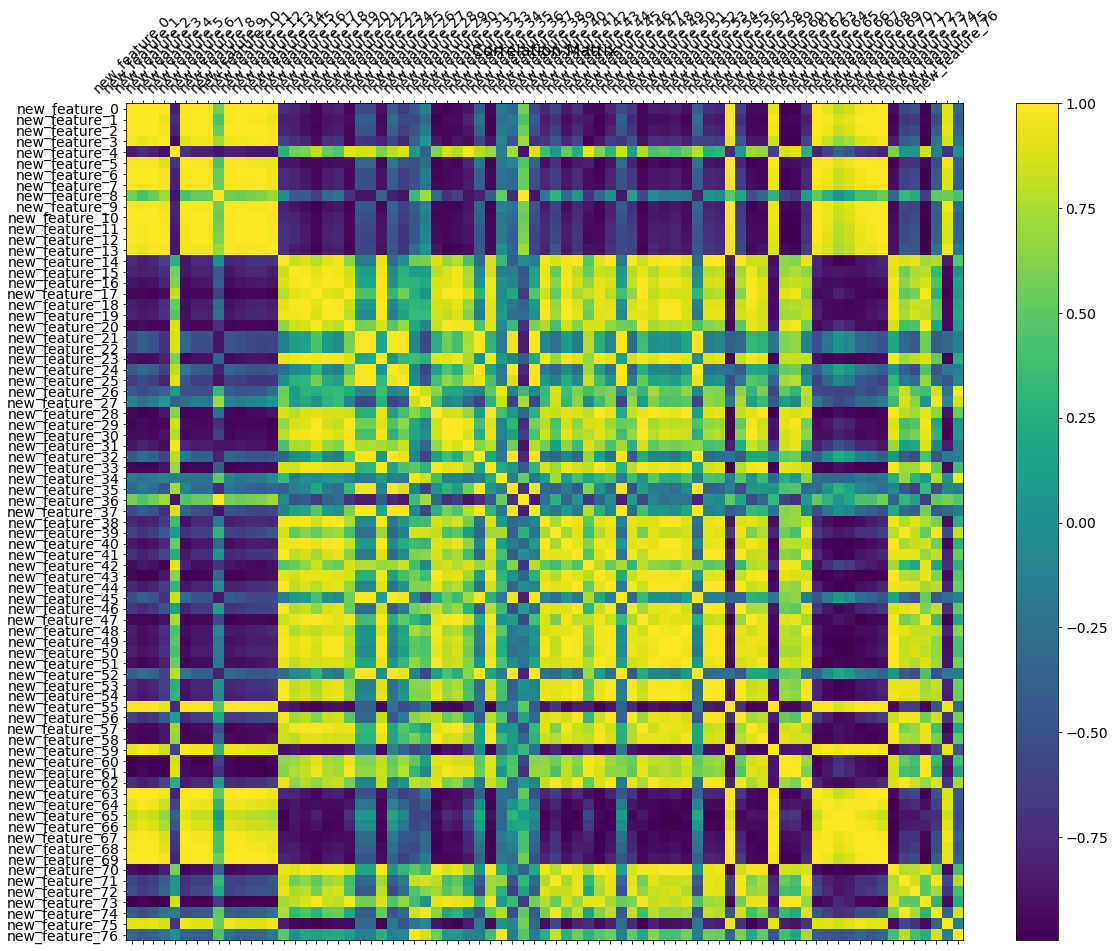

In [509]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_new_feat.loc[lst_select,:].corr(), fignum=f.number)
plt.xticks(range(df_new_feat.loc[lst_select,:].shape[1]), df_new_feat.loc[lst_select,:].columns, fontsize=14, rotation=45)
plt.yticks(range(df_new_feat.loc[lst_select,:].shape[1]), df_new_feat.loc[lst_select,:].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [531]:
import pandas as pd
import scipy.cluster.hierarchy as spc


# df = pd.DataFrame(my_data)
corr = df_new_feat.corr().values

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.25 * pdist.max(), 'distance')

In [532]:
idx

array([2, 2, 2, 2, 5, 2, 2, 2, 1, 2, 2, 2, 2, 2, 6, 6, 6, 5, 6, 6, 5, 3,
       3, 6, 3, 3, 4, 4, 6, 5, 5, 5, 3, 6, 4, 3, 1, 3, 6, 6, 6, 6, 5, 6,
       6, 3, 6, 5, 6, 6, 6, 6, 3, 6, 6, 2, 6, 5, 6, 2, 5, 5, 6, 2, 2, 2,
       2, 2, 2, 2, 6, 6, 6, 5, 4, 2, 4], dtype=int32)

In [533]:
df_rc = df_rc.sort_values(by = 'cols')

In [534]:
df_rc['cluster'] = idx.tolist()

In [535]:
df_check3 = df_rc[df_rc.order.isin(df_rc.groupby('cluster')['order'].min().tolist())]

In [536]:
df_check3

,cols_name,roc_auc,order,cols,rc_order,cluster
46,new_feature_0,0.156080,8,0,46,2
36,new_feature_8,0.188748,43,8,36,1
1,new_feature_18,0.404719,1,18,1,6
72,new_feature_37,0.012704,50,37,72,3
37,new_feature_61,0.186933,4,61,37,5
69,new_feature_74,0.083485,7,74,69,4


In [537]:
# df_check3 = df_check3.drop([155, 163, 177])

In [538]:
lst_cols = df_check3.loc[:,'cols_name']
lst_cols

46     new_feature_0
36     new_feature_8
1     new_feature_18
72    new_feature_37
37    new_feature_61
69    new_feature_74
Name: cols_name, dtype: object

In [539]:
X = df_new_feat.loc[:,df_new_feat.columns.isin(lst_cols)].iloc[:,:]
calc_vif(X)

,variables,VIF
0,new_feature_0,211.862517
1,new_feature_8,427.748791
2,new_feature_18,129.033167
3,new_feature_37,340.488954
4,new_feature_61,663.998596
5,new_feature_74,268.885063


In [540]:
X.corr()

,new_feature_0,new_feature_8,new_feature_18,new_feature_37,new_feature_61,new_feature_74
new_feature_0,1.000000,0.585528,-0.837824,-0.560650,-0.984166,-0.380659
new_feature_8,0.585528,1.000000,-0.312331,-0.885354,-0.714128,0.516484
new_feature_18,-0.837824,-0.312331,1.000000,0.096314,0.770092,0.512127
new_feature_37,-0.560650,-0.885354,0.096314,1.000000,0.684963,-0.399659
new_feature_61,-0.984166,-0.714128,0.770092,0.684963,1.000000,0.224498
new_feature_74,-0.380659,0.516484,0.512127,-0.399659,0.224498,1.000000


In [541]:
X.to_csv("..//Results//Feature_selection//" + metric_type + ".csv")

In [87]:
# from sklearn.datasets import make_friedman1
# from sklearn.feature_selection import RFE
# # from sklearn.svm import SVR
# # X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
# # estimator = SVR(kernel="linear")
# selector = RFE(estimator, n_features_to_select=5, step=1)
# selector = selector.fit(df, label)
# selector.support_


# selector.ranking_


NameError: name 'estimator' is not defined